In [1]:
import pandas as pd

df = pd.read_csv('STEM_SampleWithUpdatedData.csv')

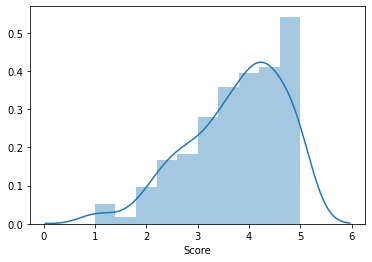

In [2]:
# Helpful visual - Score distribution for instructors 
# Get an idea of how we should define our binary categories
import seaborn as sns

sns.distplot(df['Score'])

In [3]:
# Convert Score values from string to float for analysis

df['Score'] = df['Score'].astype(float)

In [4]:
# Creating binary catagories for comparision
# One binary category will be the x-axis, the other the y-axis
# In this case, Scores will be converting into either 'High Rating' or 'Low Rating'

df['Score'] = df['Score'].apply(lambda x: 'High Rating' if x > 4 else 'Low Rating')

In [5]:
# NLP processing

import spacy
import scattertext

In [6]:
nlp = spacy.load('en')

In [7]:
# Stop words to ignore from NLTK
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
nlp.Defaults.stop_words |= stopWords

# Includes a text file to add custom stop words
with open('stopwords.txt', 'r') as f:
    str_f = f.read()
    stopwords_file = set(str_f.split('\n'))
nlp.Defaults.stop_words |= stopwords_file

In [8]:
# Defines corpus. Removes stop words
# category_col : the column in our datafile holding our binary categories.
# text_col : the column in our datafile holding our text to be analyzed 

corpus = (scattertext.CorpusFromPandas(df,
                                       category_col='Score', 
                                       text_col='Comments',
                                       nlp=nlp).build().remove_terms(nlp.Defaults.stop_words, ignore_absences=True))

In [9]:
# Using Scattertext to visualize term associations 
# category_name : label the y-axis of html visual
# not_category_name : label for the x-axis of html visual

corpus_dataframe = df
html = scattertext.produce_scattertext_explorer(corpus,
                                                category='Low Rating',
                                               category_name='Low Rating',
                                               not_category_name='High Rating',
                                               width_in_pixels=1000,
                                               height_in_pixels=700,
                                               metadata=corpus_dataframe['Name'])

In [10]:
# Saves html to file
html_file_name = "Instructor-Rating-Vs-Word-Frequency.html"
open(html_file_name, 'wb').write(html.encode('utf-8'))

1389630